In [99]:
# from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import *
import matplotlib
from qiskit.quantum_info import *
import numpy as np

In [100]:
def get_binary(psi):
    result = {}
    if not isinstance(psi, dict):
        psi_dict = psi.probabilities_dict()
    else:
        psi_dict = psi
    for state, prob in psi_dict.items():
        print(f"{state}: {prob:.3f}")
        result[state] = prob
    return result

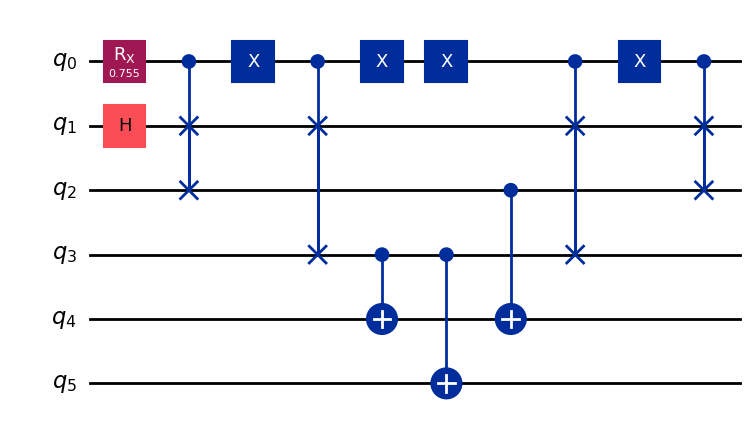

In [101]:
t = np.random.random()


qc = QuantumCircuit(6)
qc.rx(t, 0)
qc.h(1)
qc.cswap(0, 1, 2)
qc.x(0)
qc.cswap(0, 1, 3)
qc.x(0)
qc.cx(3,4)
qc.cx(3,5)
qc.cx(2,4)

qc.x(0)
qc.cswap(0, 1, 3)
qc.x(0)
qc.cswap(0, 1, 2)
qc.draw(output="mpl")

In [102]:
import numpy as np
psi0 = (Statevector.from_label('000000'))
psi0 = psi0 / np.linalg.norm(psi0.data)
psi_final = psi0.evolve(qc)

get_binary(psi0)
print("==")
get_binary(psi_final)

000000: 1.000
==
000000: 0.432
000001: 0.068
010011: 0.068
110010: 0.432


{np.str_('000000'): np.float64(0.4321435406586937),
 np.str_('000001'): np.float64(0.06785645934130612),
 np.str_('010011'): np.float64(0.06785645934130612),
 np.str_('110010'): np.float64(0.4321435406586937)}

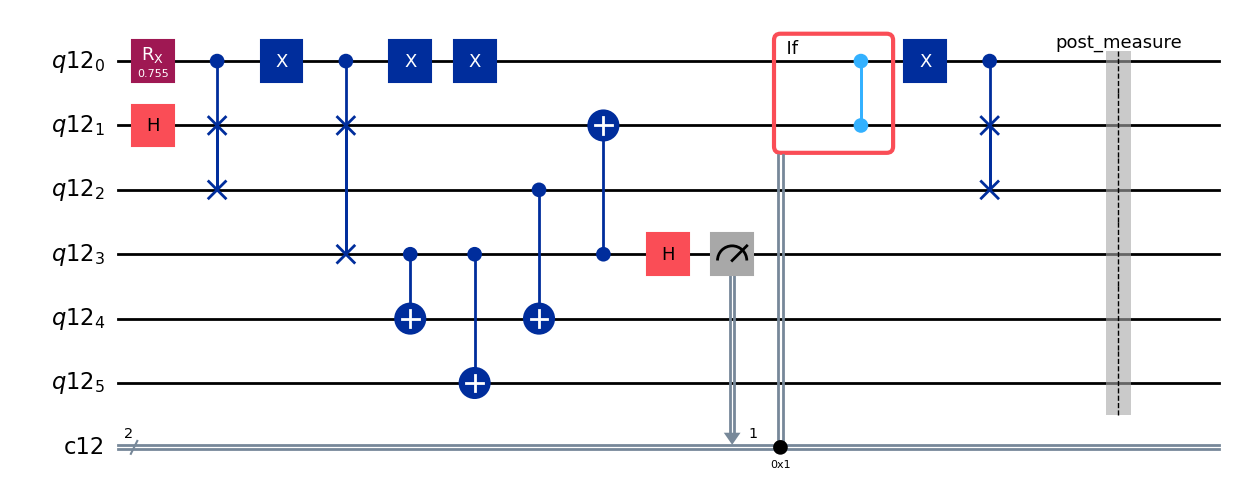

In [106]:
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.library import SaveStatevector

# Define registers
c = ClassicalRegister(2)
q = QuantumRegister(6)
qc = QuantumCircuit(q, c)

# --- Some circuit before ---

qc.rx(t, 0)
qc.h(1)
# qc.x(1)
qc.cswap(0, 1, 2)
qc.x(0)
qc.cswap(0, 1, 3)
qc.x(0)
qc.cx(3, 4)
qc.cx(3, 5)
qc.cx(2, 4)

qc.x(0)
qc.cx(3, 1)
# qc.ccx(0, 1, 3)
qc.h(3)
qc.measure(3, 1)

# ✅ Modern conditional syntax
with qc.if_test((c, 1)):   # If classical register c == 1
    qc.cz(0,1)
    # qc.x(0)                # Apply X gate on qubit 3

qc.x(0)
qc.cswap(0, 1, 2)
qc.save_statevector(label="post_measure", conditional=True)

qc.draw(output="mpl")


In [107]:
from qiskit_aer import AerSimulator
from qiskit import *

# Use AerSimulator (supports classical control)
sim = AerSimulator()

# Transpile for simulator backend
tqc = transpile(qc, sim)

# Run the circuit
result = sim.run(tqc, shots=1024).result()

# Get measurement results
counts = result.get_counts()
print(counts)


{'10': 511, '00': 513}


In [108]:
data = result.data(0)
psi_final = data["post_measure"]['0x0']
print(get_binary(psi_final))
psi_final = data["post_measure"]['0x2']
print(get_binary(psi_final))


000000: 0.432
000001: 0.068
010011: 0.068
110010: 0.432
{np.str_('000000'): np.float64(0.43214354065869387), np.str_('000001'): np.float64(0.06785645934130614), np.str_('010011'): np.float64(0.06785645934130614), np.str_('110010'): np.float64(0.43214354065869387)}
001000: 0.432
001001: 0.068
011011: 0.068
111010: 0.432
{np.str_('001000'): np.float64(0.43214354065869387), np.str_('001001'): np.float64(0.06785645934130614), np.str_('011011'): np.float64(0.06785645934130614), np.str_('111010'): np.float64(0.43214354065869387)}
